# Healthcare Diabetes Classifier Project (Logistic_Regression)
## 당뇨병 진단 예측
- 당뇨병이 양성인지 음성인지 예측

#### feature (22개)
- Id: 각 데이터 항목의 고유 식별자
- Pregnancies: 임신 횟수
- Glucose: 경구 포도당 내성 테스트에서 2시간 동안의 혈장 포도당 농도
- BloodPressure: 확장기 혈압(mmHg)
- SkinThickness: 삼두근 피부주름 두께(mm)
- Insulin: 2시간 혈청 인슐린(mu U/ml)
- BMI: 체질량 지수(체중(kg) / 키(m^2))
- DiabetesPedigreeFunction: 당뇨병의 유전적 점수인 당뇨병 혈통 기능
- Age: 나이(년)


#### target
- Outcome: 당뇨병의 존재(1) 또는 부재(0)를 나타내는 이진 분류

In [1]:
import pandas as pd

# 데이터 세트 호출
h_df = pd.read_csv('./datasets/Healthcare_Diabetes.csv', low_memory=False)
h_df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


#### 📊 데이터 탐색

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

### 🌟 1Cycle

#### 📊 전처리

In [3]:
# 불필요한 데이터 세트 제거 (id 컬럼)
pre_h_df = h_df.drop(labels='Id', axis=1)

In [4]:
# 언더 샘플링
Outcome0 = pre_h_df[pre_h_df.Outcome == 0].sample(952, random_state=124)
Outcome1 = pre_h_df[pre_h_df.Outcome == 1]
pre_h_df = pd.concat([Outcome0, Outcome1]).reset_index(drop=True)

#### 🚩 1Cycle 결과
- Logistic Regression  
**정확도: 0.7349, 정밀도: 0.7380, 재현율: 0.7263, F1:0.7321, AUC:0.7349**

---

### 🌟 2Cycle

In [5]:
# 데이터 기술 통계량 확인
pre_h_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1904.0,3.945378,3.468068,0.000,1.000,3.000,6.0000,17.00
Glucose,1904.0,126.065126,32.992682,0.000,102.000,123.000,147.0000,199.00
BloodPressure,1904.0,69.558298,19.410702,0.000,64.000,72.000,80.0000,122.00
SkinThickness,1904.0,21.270483,16.440816,0.000,0.000,24.000,33.0000,110.00
Insulin,1904.0,84.969013,118.537943,0.000,0.000,30.500,140.0000,846.00
BMI,1904.0,32.886817,8.054113,0.000,28.000,32.800,37.4000,80.60
DiabetesPedigreeFunction,1904.0,0.487416,0.336787,0.078,0.246,0.391,0.6475,2.42
Age,1904.0,33.975315,11.749707,21.000,24.000,30.000,41.0000,81.00
Outcome,1904.0,0.500000,0.500131,0.000,0.000,0.500,1.0000,1.00


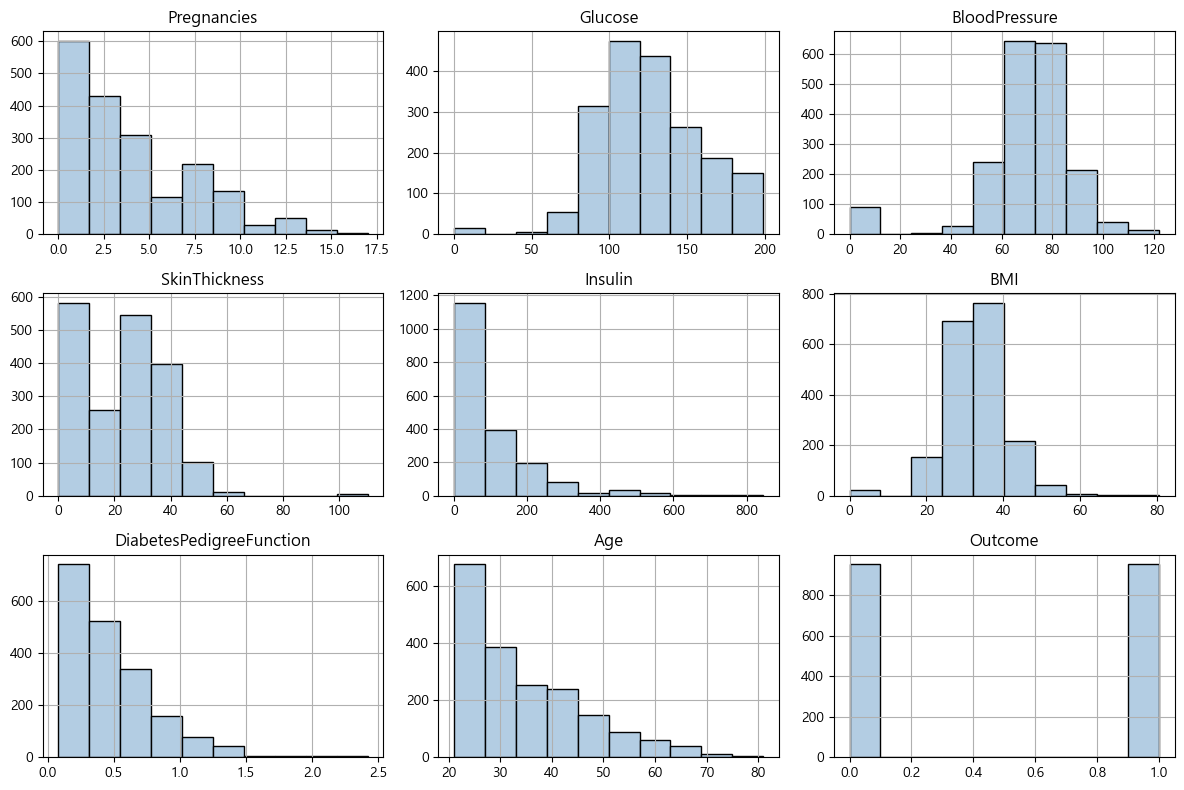

In [6]:
# 데이터 분포 확인
pre_h_df.hist(figsize=(12, 8), color=cmap(np.array([1])), edgecolor='black')

plt.tight_layout()
plt.show()

In [7]:
# 수치형 데이터 이상치 제거
from sklearn.preprocessing import StandardScaler

std_pre_h_df = pre_h_df.copy()
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']

for column in columns:
    # 표준화 객체 생성
    std = StandardScaler()
    # 데이터 표준화 변환
    result = std.fit_transform(pre_h_df[[column]])
    # 표준화 데이터 프레임 생성
    std_pre_h_df[column] = result

for column in columns:
    # 타겟 데이터 이상치 제거
    std_pre_h_df = std_pre_h_df[std_pre_h_df[column].between(-1.96, 1.96)]

# 이상치 제거 후 유지되는 인덱스를 대조하여 원본 데이터 이상치 제거
pre_h_df = pre_h_df.iloc[std_pre_h_df.index].reset_index(drop=True)

pre_h_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8,107,80,0,0,24.6,0.856,34,0
1,5,126,78,27,22,29.6,0.439,40,0
2,4,83,86,19,0,29.3,0.317,34,0
3,0,91,80,0,0,32.4,0.601,27,0
4,7,124,70,33,215,25.5,0.161,37,0
...,...,...,...,...,...,...,...,...,...
1574,0,131,88,0,0,31.6,0.743,32,1
1575,6,104,74,18,156,29.9,0.722,41,1
1576,6,102,82,0,0,30.8,0.180,36,1
1577,6,134,70,23,130,35.4,0.542,29,1


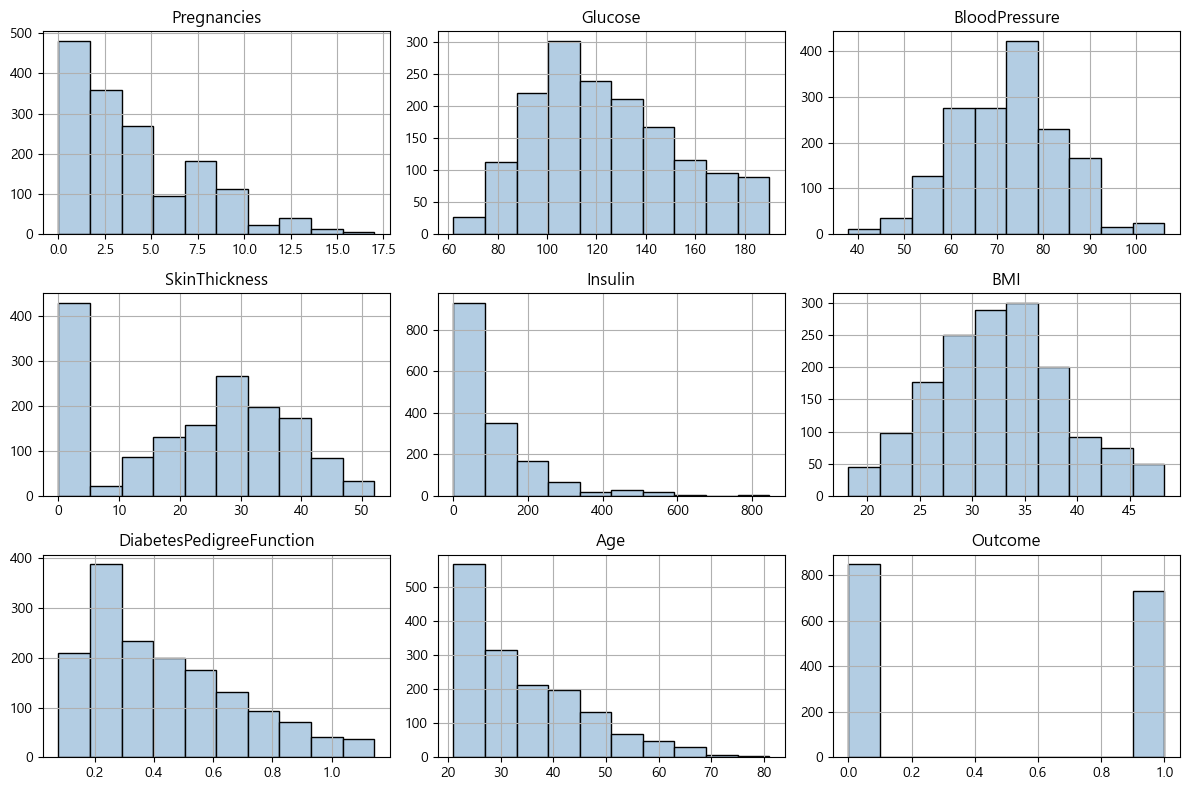

In [8]:
# 데이터 분포 확인
pre_h_df.hist(figsize=(12, 8), color=cmap(np.array([1])), edgecolor='black')

plt.tight_layout()
plt.show()

In [9]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

# 문제/정답 및 훈련/테스트 데이터 분리 
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

# 객체 생성
# solver: 최적화에 사용되는 알고리즘 (liblinear: 작은 데이터 세트 사용)
# penalty: 규제 유형 (l2 = L2 규제)
lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)

# 훈련
lg.fit(X_train, y_train)

# 예측
prediction = lg.predict(X_test)

오차 행렬
[[139  31]
 [ 35 111]]
정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890
###########################################################################


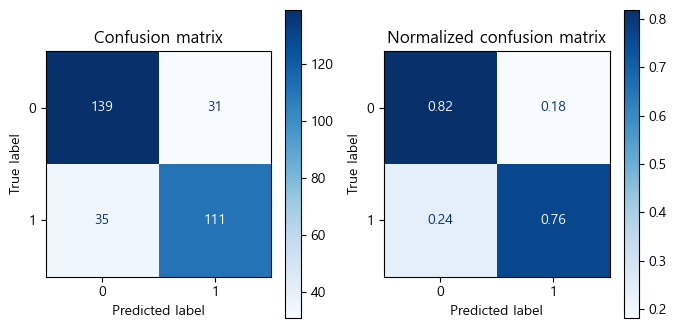

In [11]:
get_evaluation(y_test, prediction, lg, X_test)

In [12]:
data = {
    'model': ['1Cycle', '2Cycle'],
    '정확도': [0.7349, 0.7911],
    '정밀도': [0.7380, 0.7817],
    '재현율': [0.7263, 0.7603],
    'F1': [0.7321, 0.7708],
    'AUC': [0.7349, 0.7890]
}

Cycle2 = pd.DataFrame(data)

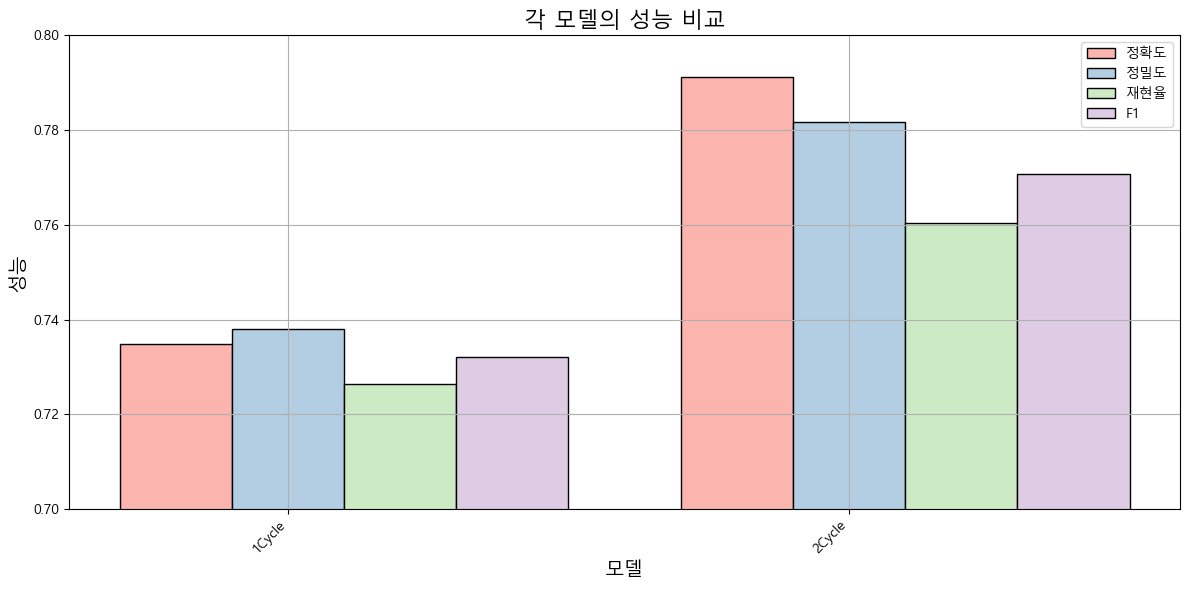

,model,정확도,정밀도,재현율,F1,AUC
0,1Cycle,0.7349,0.7380,0.7263,0.7321,0.7349
1,2Cycle,0.7911,0.7817,0.7603,0.7708,0.7890


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 프레임에서 각 모델명과 해당 지표들을 추출합니다.
models = Cycle2['model']
accuracy = Cycle2['정확도']
precision = Cycle2['정밀도']
recall = Cycle2['재현율']
f1 = Cycle2['F1']
AUC = Cycle2['AUC']

# 그래프를 그립니다.
bar_width = 0.2
index = np.arange(len(models))

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

plt.figure(figsize=(12, 6))

plt.bar(index, accuracy, color=cmap(np.array([0])), width=bar_width, label='정확도', edgecolor='black')
plt.bar(index + bar_width, precision, color=cmap(np.array([1])), width=bar_width, label='정밀도', edgecolor='black')
plt.bar(index + 2*bar_width, recall, color=cmap(np.array([2])), width=bar_width, label='재현율', edgecolor='black')
plt.bar(index + 3*bar_width, f1, color=cmap(np.array([3])), width=bar_width, label='F1', edgecolor='black')
# plt.bar(index + 4*bar_width, AUC, color=cmap(np.array([4])), width=bar_width, label='AUC', edgecolor='black')

plt.title('각 모델의 성능 비교', fontsize=16)
plt.xlabel('모델', fontsize=14)
plt.ylabel('성능', fontsize=14)
plt.xticks(index + bar_width, models, rotation=45, ha='right')
plt.legend()
plt.grid(True)

# y축의 범위 지정
plt.ylim(0.7, 0.8)

plt.tight_layout()
plt.show()

display(Cycle2)

#### 🚩 1Cycle 결과
- Logistic Regression  
**정확도: 0.7349, 정밀도: 0.7380, 재현율: 0.7263, F1:0.7321, AUC:0.7349**

#### 🚩 2Cycle 결과
- 전처리 후 Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 💡 분석
- 이상치 제거 후 성능이 향상된 것을 확인함.
- 최소-최대 스케일링(min-max scaling)을 통해 값을 정규화하여 성능 차이를 비교하기로 함.